In [1]:
!pip install wget

In [2]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import wget
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras import models
from keras import layers
from keras.layers import BatchNormalization
from keras.layers import Flatten

In [3]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/My Drive/5.ORC

/content/drive/My Drive/5.ORC


In [5]:

mnist = tf.keras.datasets.mnist
((training_images, training_labels),(test_images, test_labels)) = mnist.load_data() 

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
valid_images = training_images[0:10000]
valid_labels = training_labels[0:10000]
training_images = training_images[10000:]
training_labels = training_labels[10000:]


In [8]:
training_images.shape

(50000, 28, 28)

In [9]:
valid_images.shape

(10000, 28, 28)

In [10]:
training_labels

array([3, 8, 7, ..., 5, 6, 8], dtype=uint8)

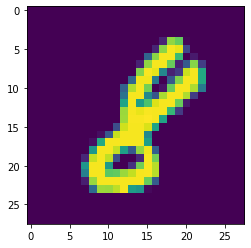

In [11]:
plt.imshow(training_images[1])

In [12]:
training_images[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254,
        255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [13]:
training_labels[1]

8

In [14]:
mmsl = MinMaxScaler()

In [15]:
training_images = np.array(training_images)/255

In [16]:
valid_images =np.array(valid_images)/255
test_images = np.array(test_images)/255

In [17]:
training_labels[0]

3

**Build model**

In [18]:
model = models.Sequential()

In [19]:
model.add(layers.Conv2D(32,(3,3), input_shape = (28,28,1),activation="relu"))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D())

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
Total params: 448
Trainable params: 384
Non-trainable params: 64
_________________________________________________________________


In [21]:
model.add(layers.Flatten())
model.add(layers.Dense(128,"relu"))
model.add(layers.Dense(10,"softmax"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 694,090
Trainable params: 694,026
Non-trainable params: 64
_________________________________________________

In [23]:
training_images = training_images.reshape(50000,28,28,1)
valid_images = valid_images.reshape(10000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

In [24]:
model.compile("adam","sparse_categorical_crossentropy","acc")

In [25]:
model.fit(training_images,training_labels,epochs= 10,steps_per_epoch=30,validation_data=(valid_images,valid_labels))

Epoch 1/10
30/30 [==============================] - 2s 79ms/step - loss: 0.5253 - acc: 0.8417 - val_loss: 1.7416 - val_acc: 0.8468
Epoch 2/10
30/30 [==============================] - 2s 68ms/step - loss: 0.1102 - acc: 0.9672 - val_loss: 1.6352 - val_acc: 0.9372
Epoch 3/10
30/30 [==============================] - 2s 70ms/step - loss: 0.0587 - acc: 0.9836 - val_loss: 1.4734 - val_acc: 0.9626
Epoch 4/10
30/30 [==============================] - 2s 68ms/step - loss: 0.0375 - acc: 0.9900 - val_loss: 1.2804 - val_acc: 0.9730
Epoch 5/10
30/30 [==============================] - 2s 67ms/step - loss: 0.0246 - acc: 0.9946 - val_loss: 1.0888 - val_acc: 0.9761
Epoch 6/10
30/30 [==============================] - 2s 69ms/step - loss: 0.0174 - acc: 0.9961 - val_loss: 0.9120 - val_acc: 0.9769
Epoch 7/10
30/30 [==============================] - 2s 68ms/step - loss: 0.0122 - acc: 0.9979 - val_loss: 0.7036 - val_acc: 0.9749
Epoch 8/10
30/30 [==============================] - 2s 67ms/step - loss: 0.0087 - a

In [27]:
test = model.predict(test_images)

In [28]:
test

array([[6.7094811e-03, 2.6674818e-03, 1.3930497e-02, ..., 9.1183656e-01,
        2.8065748e-03, 1.2026804e-02],
       [2.0087952e-02, 9.7298183e-02, 8.0912352e-01, ..., 7.5949897e-04,
        2.6856169e-02, 4.4009401e-03],
       [5.6056674e-03, 9.0403837e-01, 1.1527878e-02, ..., 2.7275428e-02,
        6.0578459e-03, 7.6197530e-03],
       ...,
       [1.5977098e-03, 5.5016610e-03, 2.8533072e-03, ..., 5.4966945e-02,
        5.8442358e-02, 5.8964461e-02],
       [1.2456748e-02, 4.9107834e-03, 6.8500353e-04, ..., 4.2935736e-03,
        3.2494754e-02, 4.0210471e-03],
       [7.3623061e-03, 3.8611863e-04, 1.1314596e-02, ..., 4.0999841e-04,
        6.4129098e-03, 1.1293849e-03]], dtype=float32)

In [33]:
np.argmax(test[0])

7

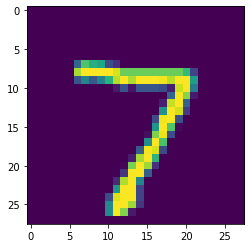

In [35]:
plt.imshow(test_images[0].reshape(28,28))